In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

Considere un sistema en el que la hamiltoniana es
$$
H = \frac{1}{2}(p_x^2+p_y^2)+\frac{1}{2}(x^2+y^2)+x^2y-\frac{1}{3}y^3
$$

a) Muestre que el sistema tiene orbitas acotadas

Como H = T+V, por lo que el potencial es $V(x,y) =\frac{1}{2}(x^2+y^2)+x^2y-\frac{1}{3}y^3$

In [3]:
def potencial(x,y):
    V = 0.5*(x**2+y**2)+(x**2)*y-1/3*(y**3)
    return V

Grafica de potencial

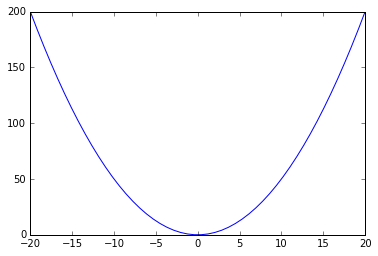

In [6]:
x = linspace(-20,20)
plot(x,potencial(x,0)) # haciendo x = 0
show()

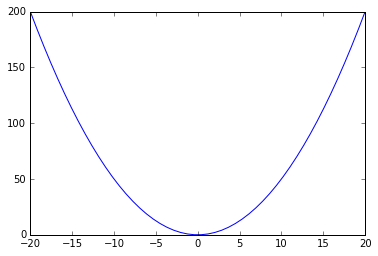

In [9]:
y = linspace(-20,20)
plot(y,potencial(0,y)) # haciendo x = 0
show()

# Observamos que en las dos graficas hay un minimo de potencial. Esto indica que si el sistema tiene energía menor a cierto limite de energia, se tendra una órbita acotada.


b) Realizar programa que escoja condiciones iniciales con x = 0 y con valores de $(y,p_y)$ compatibles con la condición de energía $E< \frac{1}{6}$

hacienco x = 0, la energía inicial será 
$$
E_i = H = \frac{1}{2}(p_x^2+p_y^2)+\frac{1}{2}(y^2)-\frac{1}{3}y^3
$$

In [69]:
def Energia(x_p):
    E = .5*(x_p[2]**2+x_p[3]**2+x_p[1]**2+x_p[0]**2)-1/3*x_p[1]**3+x_p[0]**2*x_p[1]
    return E

In [84]:
def cond_ini(En=1/6): # condiciones inicales compatibles con la condicion de energía menor a 1/6
    x,E = 0,100
    while E>En:
        y = 10*(rand()-1) # condiciones aleatorias 
        py =  10*(rand()-1)
        E = Energia([0,y,0,py]) # x = px = 0
    return y,py  

Para $E_i =0.1$

Ahora obtenga la trayectoria para la condición inicial que se escoja y resuelva las ecuaciones de movimiento dadas por:
$$
\dot x = \frac{\partial H}{\partial p_x}= p_x
$$
$$
\dot y = \frac{\partial H}{\partial p_y}= p_y
$$
$$
\dot{p_x} =- \frac{\partial H}{\partial x} = -x-2xy
$$
$$
\dot{p_y} =- \frac{\partial H}{\partial y} =-y -x^2+y^2
$$

In [85]:
def ecu(x_p,t): # escuaciones de moviemiento
    dx = x_p[2]
    dy = x_p[3]
    dpx = -x_p[0]-2*x_p[0]*x_p[1]
    dpy = -x_p[1]-x_p[0]**2+x_p[1]**2
    return array([dx,dy,dpx,dpy])

Condiciones iniciales = [ 0.         -0.2431902   0.18261069 -0.32789001]
Energia inicial = 0.1


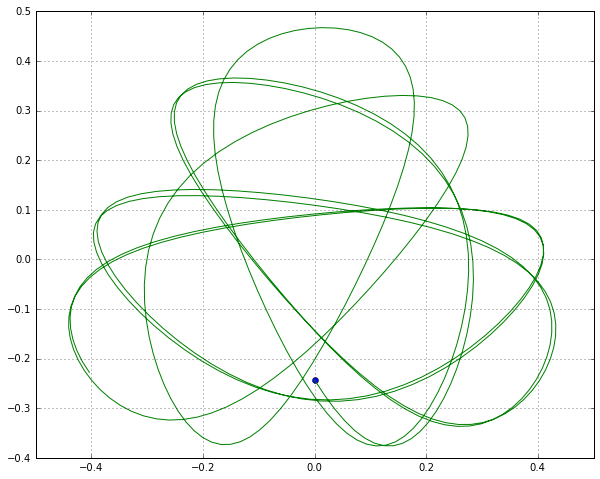

In [146]:
x = 0
E = .1
y,py =cond_ini(E)
E_cont = Energia([0,y,0,py])
px =sqrt(2*(E - E_cont))
cond = array([x,y,px,py])
t =arange(0,50,.1)
pto_ini = cond
sol = odeint(ecu,pto_ini,t,atol=1e-19,rtol=1e-9)
subplots(figsize=(10,8)) 
grid(True)
plot(pto_ini[0],pto_ini[1],'o')
plot(sol[:,0],sol[:,1])
print "Condiciones iniciales =",cond
print "Energia inicial =", Energia(cond)
show()

c) Ahora programe una funcion que obtenga todos los puntos de la trayectoria solucion cuando x = 0.

In [147]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

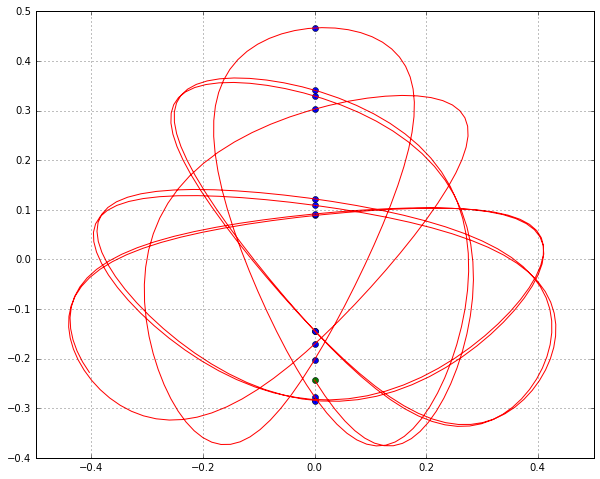

In [148]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ecu,sol[i],t[i])
        j+=1
raices,puntos = raices[0:j],puntos[0:j]
subplots(figsize=(10,8)) 
grid(True)
plot(puntos[:,0],puntos[:,1],'o')
plot(pto_ini[0],pto_ini[1],'o')
plot(sol[:,0],sol[:,1])
show()

Escogiendo 15 trayectorias tales que x = 0, y ∈ [0, 0.1] y px ∈ [−0.15, 0.15]. El valor de py tendra que
ser compatible con el valor de energıa en el siguiente inciso

In [114]:
def cond_ini2(n,En=1/6):# Condiciones iniciales modificadas para que guarde las condiciones iniciales en c_i
    x= 0
    c_i =zeros([n,4])
    for i in range(n):
        y = 0.1*(rand())
        px =  0.15*(rand()-1)
        E_cont = Energia([0,y,px,0])
        py =sqrt(2*(En - E_cont))
        c_i[i]=array([0,y,px,py])
    return c_i

d) Realice simulaciones con las condiciones iniciales anteriores para los siguientes valores de energıa
E = 0.01, 0.03, 0.1, 0.12, 0.15, 0.166.

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


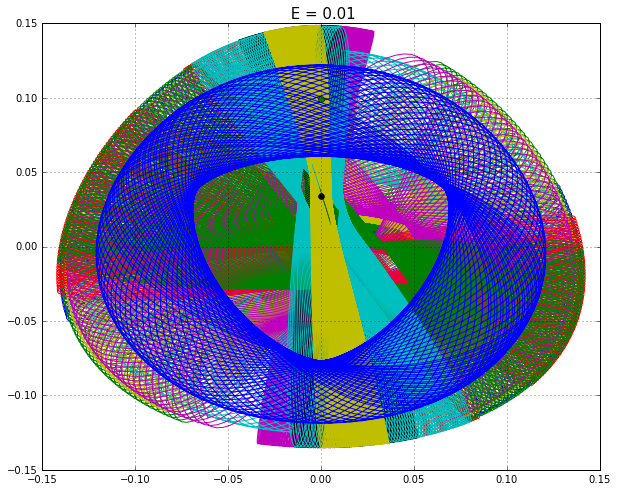

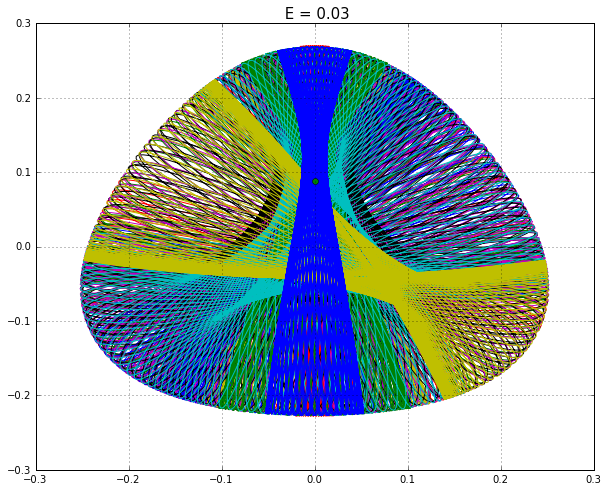

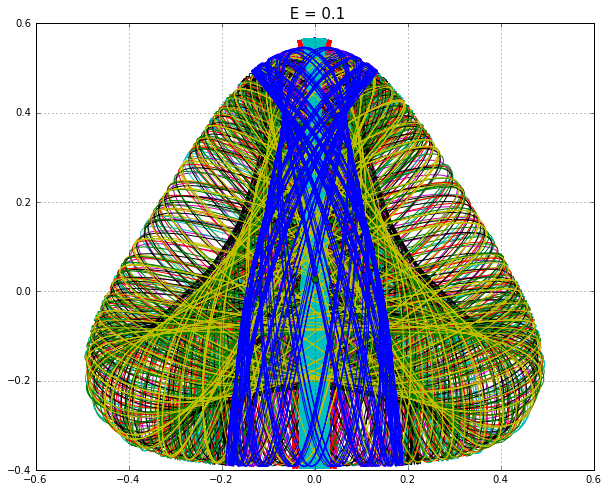

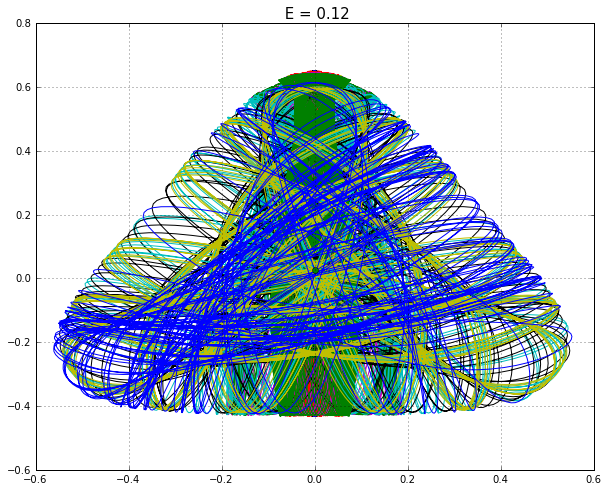

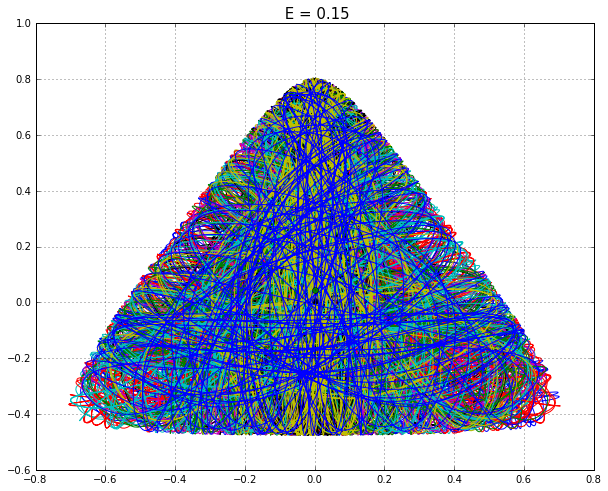

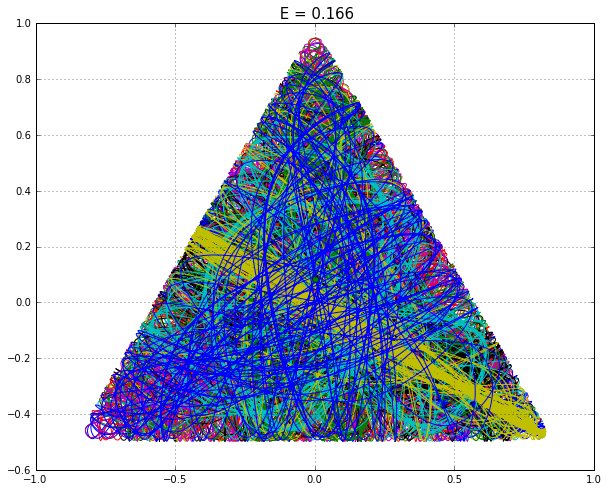

In [151]:
E = array([0.01,0.03,0.1,0.12,0.15,0.166]) # valores de la energia
t =arange(0,400,.1)
num_tray = 15
sol = []  #Soluciones para las condiciones iniciales para cada energía
for i in range(len(E)): 
    subplots(figsize=(10,8))
    solu =[]
    pto_ini = []
    for j in range(num_tray):
        pto_ini = cond_ini2(num_tray,E[i])[j]
        soluc = odeint(ecu,pto_ini,t,atol=1e-19,rtol=1e-9)
        plot(soluc[:,0],soluc[:,1])
        plot(pto_ini[0],pto_ini[1],'o')
        grid(True)
        title(' E = %s'%E[i],fontsize = 15)
        solu.append(soluc)
    sol.append(solu)
    show()

Las graficas del espacio fase (y, py) para cada condicion inicial.

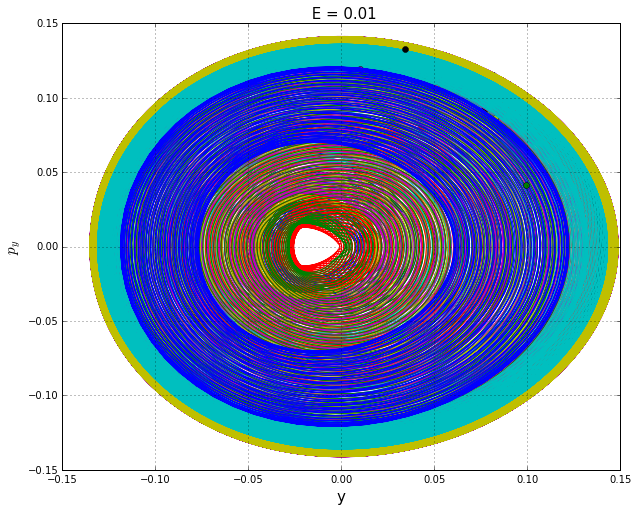

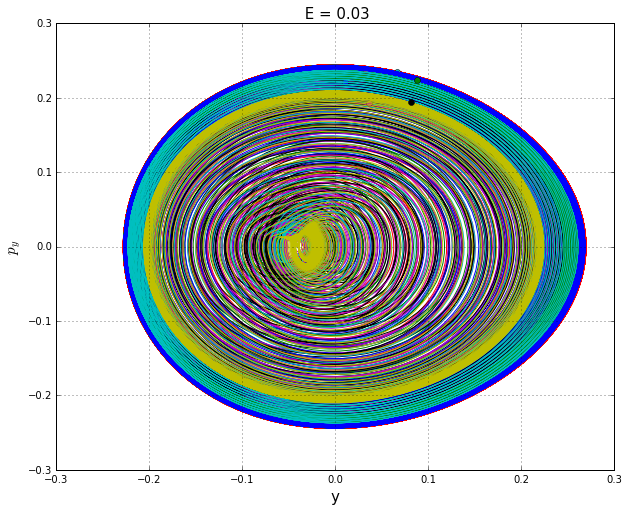

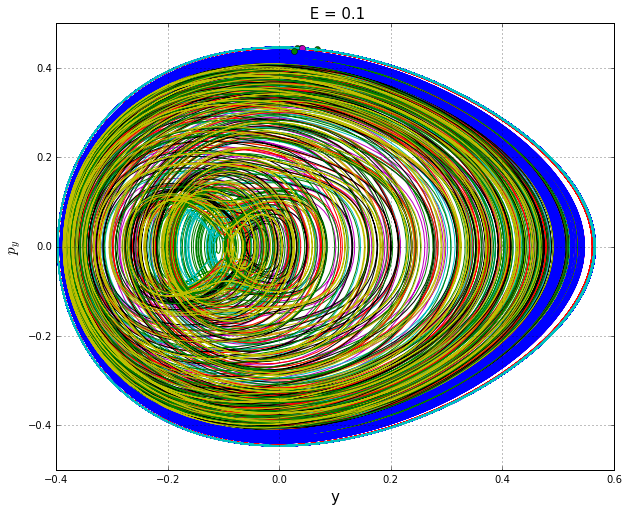

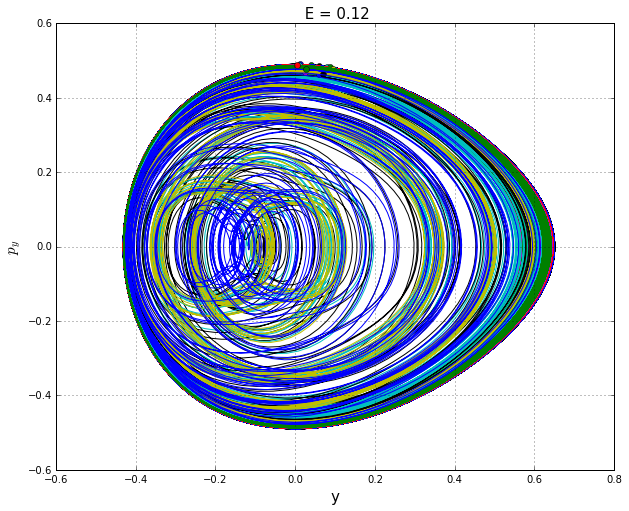

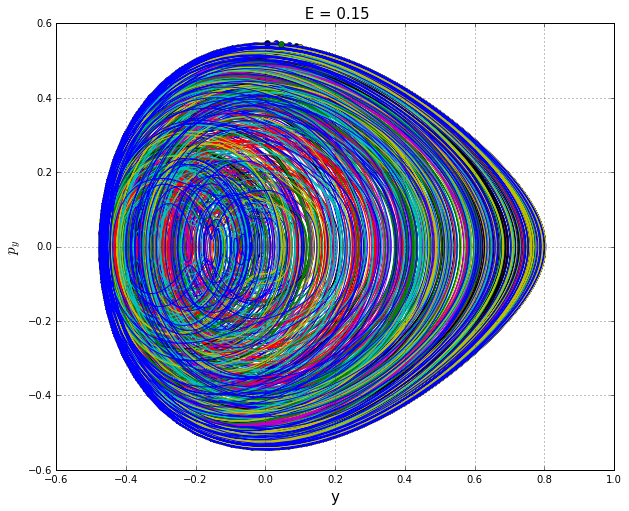

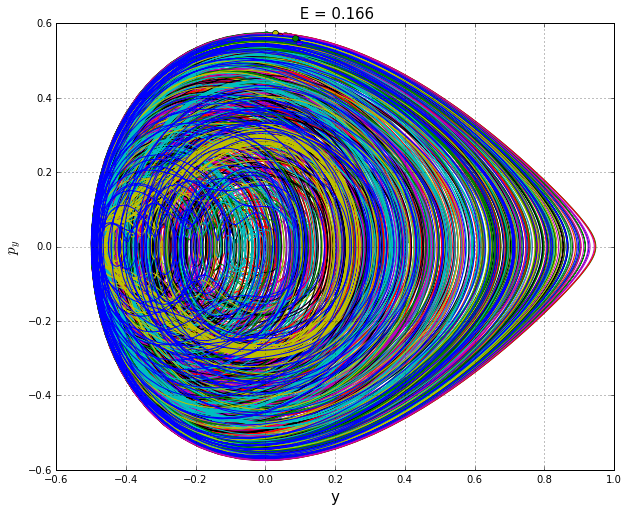

In [152]:
for i in range(len(E)):
    subplots(figsize=(10,8))
    for j in range(num_tray):
        plot(sol[i][j][:,1],sol[i][j][:,3]) # componetes (y,py)
        grid(True)
        title(' E = %s'%E[i],fontsize = 15)
        xlabel('y',fontsize =15), ylabel('$p_y$',fontsize =15)
        plot(sol[i][j][0,1],sol[i][j][0,3],'o')
    show()

Graficas los puntos  x = 0 para cada energía dada

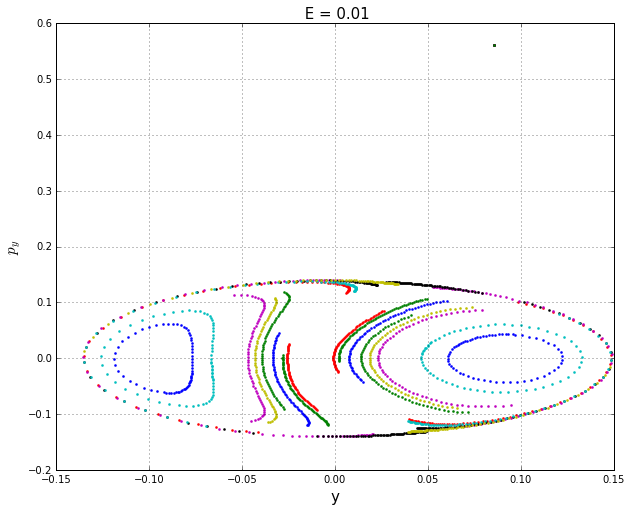

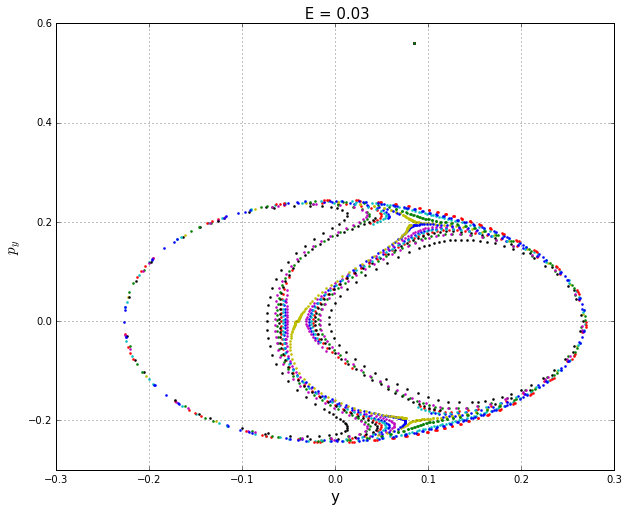

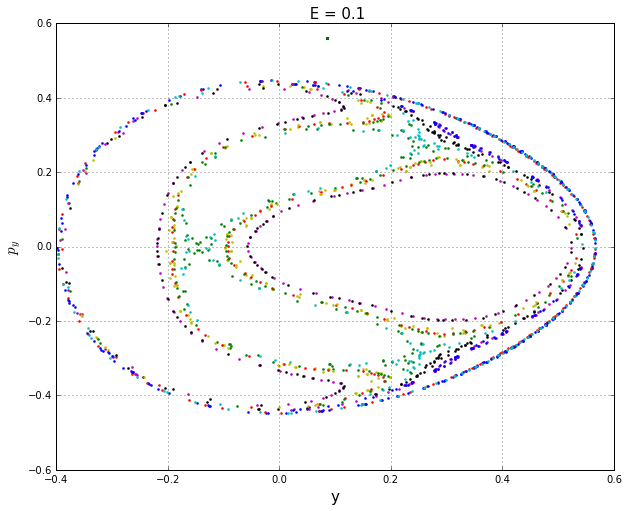

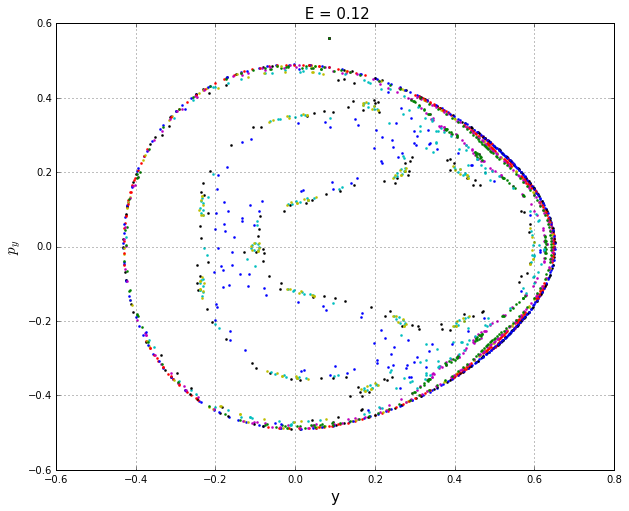

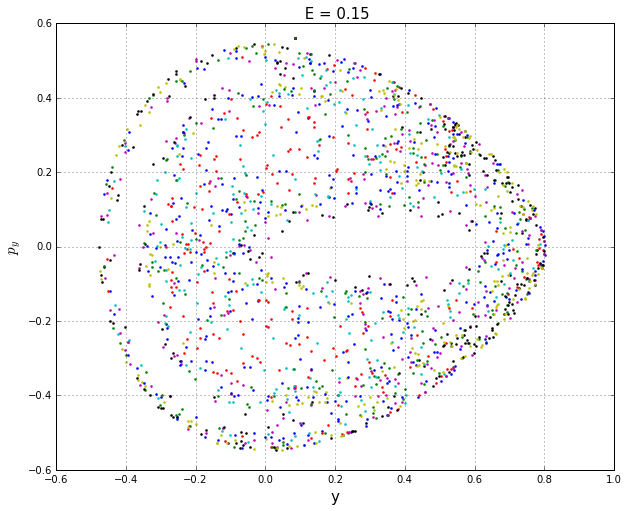

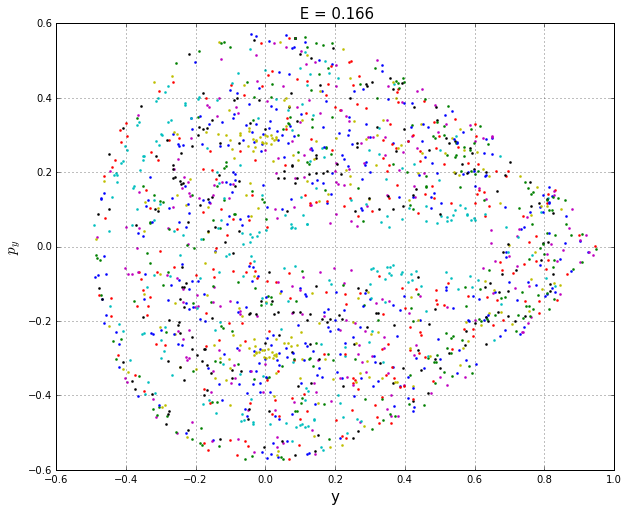

In [153]:
for j in range(len(E)):
    subplots(figsize=(10,8)) 
    for n in range(num_tray):
        num = len(t)
        raices = zeros(num)
        puntos = zeros((num,4))
        m=0
        for i in range(len(t)-1):
            if (sol[j][n][i][0]*sol[j][n][i+1][0]) < 0:
                raices[m],puntos[m] = root_trayec(ecu,sol[j][n][i],t[i])
                m+=1
        raices,puntos = raices[0:m],puntos[0:m]
        plot(puntos[:,1],puntos[:,3],'.',markersize = 4)
        plot(pto_ini[1],pto_ini[3],'.',markersize = 4)
        grid(True)
        xlabel('y',fontsize =15), ylabel('$p_y$',fontsize =15)
        title(' E = %s'%E[j],fontsize = 15)
        
    show()